#### IMPORTING THE NECESSARY LIBRARIES:

In [2]:
!sudo apt-get install python3.9

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib mailcap mime-support
  python3.9-minimal
Suggested packages:
  python3.9-venv binfmt-support
The following NEW packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib mailcap mime-support python3.9
  python3.9-minimal
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,284 kB of archives.
After this operation, 19.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mime-support all 3.66 [3,696 B]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.9-minimal amd64 3.9.20-1+jammy1 [837 kB]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.9-minima

In [3]:
!pip install yfinance

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler



### IMPORTING THE DATA

In [6]:
import yfinance as yf

# Fetch historical data for Bitcoin using yfinance
data = yf.download('BTC-USD', start='2017-04-01', end='2023-05-01')

# Convert to DataFrame and sort by date
data.reset_index(inplace=True)
data.sort_values(by='Date', inplace=True)

# Display the last few rows of the DataFrame
data.tail()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
2216,2023-04-26 00:00:00+00:00,28422.701172,28422.701172,29995.837891,27324.548828,28300.058594,31854242019
2217,2023-04-27 00:00:00+00:00,29473.787109,29473.787109,29871.546875,28402.886719,28428.464844,27153445027
2218,2023-04-28 00:00:00+00:00,29340.261719,29340.261719,29572.791016,28929.609375,29481.013672,17544464887
2219,2023-04-29 00:00:00+00:00,29248.488281,29248.488281,29452.455078,29088.042969,29336.566406,10662634333
2220,2023-04-30 00:00:00+00:00,29268.806641,29268.806641,29952.029297,29114.021484,29245.515625,14652199272


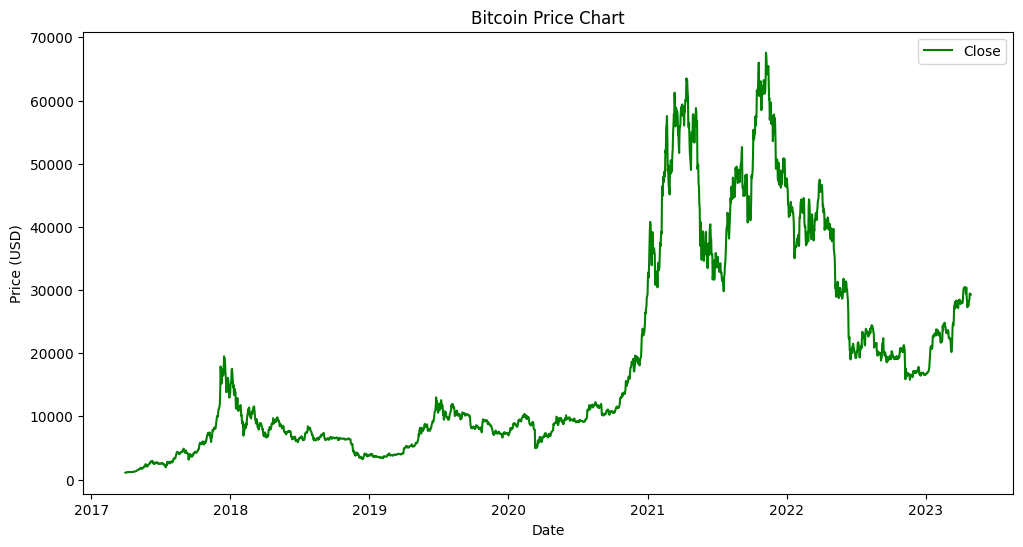

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
data_indexed = data.set_index('Date')

# Plot the opening prices in blue
# ax.plot(data_indexed.index, data_indexed['Open'], color='red',linewidth = 3, label='Open')

# Plot the closing prices in red
ax.plot(data_indexed.index, data_indexed['Close'], color='green', label='Close')

# Add title and axis labels
ax.set_title('Bitcoin Price Chart')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')

# Add legend
ax.legend()

# Show the plot
plt.show()

### Spliting the data before and after pandemic

In [8]:
# for training the model
data_train = data[data['Date'] < '2020-04-01'].copy()
data_train

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2017-04-01 00:00:00+00:00,1080.500000,1080.500000,1091.719971,1061.089966,1071.709961,289633984
1,2017-04-02 00:00:00+00:00,1102.170044,1102.170044,1107.589966,1075.449951,1080.609985,514187008
2,2017-04-03 00:00:00+00:00,1143.810059,1143.810059,1151.739990,1102.949951,1102.949951,580444032
3,2017-04-04 00:00:00+00:00,1133.250000,1133.250000,1156.439941,1120.520020,1145.520020,436310016
4,2017-04-05 00:00:00+00:00,1124.780029,1124.780029,1135.089966,1113.630005,1134.140015,414784000
...,...,...,...,...,...,...,...
1091,2020-03-27 00:00:00+00:00,6469.798340,6469.798340,6793.836426,6466.701660,6719.389160,34585598367
1092,2020-03-28 00:00:00+00:00,6242.193848,6242.193848,6467.500977,6117.837891,6467.253906,34885225901
1093,2020-03-29 00:00:00+00:00,5922.042969,5922.042969,6250.467285,5920.085938,6245.624512,28373690931


In [9]:
# for testing the model
data_test = data[data['Date'] > '2020-04-01'].copy()
data_test

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1097,2020-04-02 00:00:00+00:00,6793.624512,6793.624512,7088.247559,6595.918457,6606.776367,47660646124
1098,2020-04-03 00:00:00+00:00,6733.387207,6733.387207,7003.220703,6673.335938,6797.396484,38976504903
1099,2020-04-04 00:00:00+00:00,6867.527344,6867.527344,6878.953613,6696.484863,6738.382812,33185988584
1100,2020-04-05 00:00:00+00:00,6791.129395,6791.129395,6883.414062,6715.929199,6862.537598,29510409856
1101,2020-04-06 00:00:00+00:00,7271.781250,7271.781250,7271.781250,6782.889648,6788.049805,46896904615
...,...,...,...,...,...,...,...
2216,2023-04-26 00:00:00+00:00,28422.701172,28422.701172,29995.837891,27324.548828,28300.058594,31854242019
2217,2023-04-27 00:00:00+00:00,29473.787109,29473.787109,29871.546875,28402.886719,28428.464844,27153445027
2218,2023-04-28 00:00:00+00:00,29340.261719,29340.261719,29572.791016,28929.609375,29481.013672,17544464887


In [10]:
train = data_train.drop(['Date', 'Close'], axis = 1)
train.head()

<ipython-input-10-27eabf4e2339>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  train = data_train.drop(['Date', 'Close'], axis = 1)


Price,Adj Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,1080.500000,1091.719971,1061.089966,1071.709961,289633984
1,1102.170044,1107.589966,1075.449951,1080.609985,514187008
2,1143.810059,1151.739990,1102.949951,1102.949951,580444032
3,1133.250000,1156.439941,1120.520020,1145.520020,436310016
4,1124.780029,1135.089966,1113.630005,1134.140015,414784000


In [11]:
# performing MinMaxScaler
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
train

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.43839236e-03],
       [1.17663904e-03, 8.35382491e-04, 8.01651182e-04, 4.83589464e-04,
        4.47397806e-03],
       [3.43760661e-03, 3.15940068e-03, 2.33684826e-03, 1.69744817e-03,
        5.36966351e-03],
       ...,
       [2.62885875e-01, 2.71551891e-01, 2.71255142e-01, 2.81128506e-01,
        3.81088420e-01],
       [2.90458312e-01, 2.85592244e-01, 2.70314397e-01, 2.63736398e-01,
        4.99076021e-01],
       [2.90936282e-01, 2.84924745e-01, 2.96604102e-01, 2.91179637e-01,
        4.40741883e-01]])

In [12]:
train.shape[0]

1096

In [13]:
train_X = []
train_Y = []

for i in range(60, train.shape[0]):
    train_X.append(train[i-60:i])
    train_Y.append(train[i,0])

X_train, Y_train = np.array(train_X), np.array(train_Y)

In [14]:
X_train.shape

(1036, 60, 5)

# Building LSTM

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

regressor = Sequential()

regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units =1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
regressor.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 60)              │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 60)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 60, 80)              │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 179,561 (701.41 KB)

 Trainable params: 179,561 (701.41 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 20, batch_size =50)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 406ms/step - loss: 0.0865
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 252ms/step - loss: 0.0158
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 202ms/step - loss: 0.0109
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - loss: 0.0091
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 313ms/step - loss: 0.0091
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - loss: 0.0077
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 249ms/step - loss: 0.0086
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 9s 202ms/step - loss: 0.0072
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 318ms/step - loss: 0.0067
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - loss: 0.0072
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - loss: 0.0072
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - loss: 0.0055
Epoch 13/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 303ms/step - loss: 0.0060
Epoch 14/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 202ms/step - loss: 0.0059
Epoch 15/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 279ms/step - 

 # Test Dataset

In [19]:
test_dataset = data_train.tail(90)
df = pd.concat([test_dataset, data_test], ignore_index=True)
df = df.drop(['Date', 'Close'], axis = 1)
df.head()

<ipython-input-19-e25d6169dffc>:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Close'], axis = 1)


Price,Adj Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
1,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
3,7411.317383,7544.497070,7400.535645,7410.451660,19725074095
4,7769.219238,7781.867188,7409.292969,7410.452148,23276261598


In [20]:
inputs = scaler.transform(df)
inputs

array([[0.3206278 , 0.3221743 , 0.32792815, 0.33312383, 0.2787328 ],
       [0.34014325, 0.33278424, 0.32679635, 0.32127198, 0.37754378],
       [0.34371456, 0.33350384, 0.34882046, 0.3408843 , 0.24685908],
       ...,
       [1.53444723, 1.49921836, 1.5557698 , 1.5436407 , 0.23469518],
       [1.52946412, 1.49288398, 1.56461441, 1.53579205, 0.14166421],
       [1.53056736, 1.51918113, 1.56606467, 1.53084474, 0.19559653]])

In [21]:
Xtest = []
Ytest = []

for i in range (60, inputs.shape[0]):
    Xtest.append(inputs[i-60:i])
    Ytest.append(inputs[i, 0])

X_test, Y_test = np.array(Xtest), np.array(Ytest)
X_test.shape, Y_test.shape

((1154, 60, 5), (1154,))

In [22]:
Y_pred = regressor.predict(X_test)
Y_pred, Y_test

37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step


(array([[0.35152143],
        [0.34495217],
        [0.33868074],
        ...,
        [1.2865415 ],
        [1.2887568 ],
        [1.2916527 ]], dtype=float32),
 array([0.42293599, 0.41848986, 0.41672301, ..., 1.53444723, 1.52946412,
        1.53056736]))

In [23]:
scaler.scale_

array([5.42979534e-05, 5.26391146e-05, 5.58253482e-05, 5.43357458e-05,
       1.35183470e-11])

In [24]:
scale = 1/5.18164146e-05
scale

19298.903787912797

In [25]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale


In [26]:
Y_pred

array([[ 6783.9785],
       [ 6657.1987],
       [ 6536.1675],
       ...,
       [24828.84  ],
       [24871.596 ],
       [24927.482 ]], dtype=float32)

In [27]:
Y_test

array([ 8162.20089818,  8076.39561426,  8042.29720085, ...,
       29613.14938518, 29516.98082787, 29538.27225338])

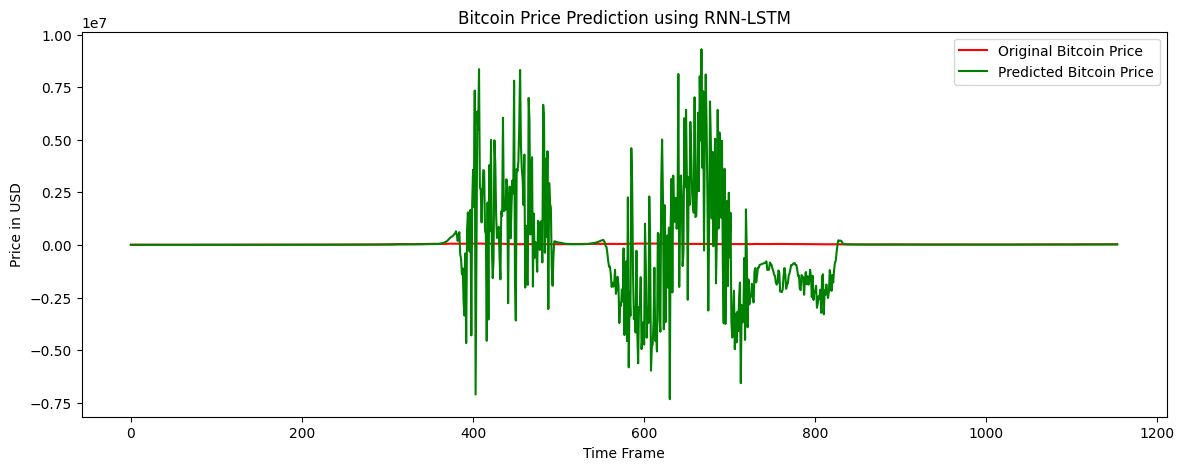

In [28]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Original Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time Frame')
plt.ylabel('Price in USD')
plt.legend()
plt.show()